In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle


In [2]:
column_names = ["mpg", "cylinders", "displacement", "horsepower", 
                "weight", "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv("auto-mpg.data.csv", delim_whitespace=True, names=column_names)


/var/folders/6d/p8vcxrp97d1bp5991h5ygbpc0000gn/T/ipykernel_29012/2424745304.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("auto-mpg.data.csv", delim_whitespace=True, names=column_names)


In [3]:
# Display the first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,-3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,NaN,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
print("\nDataset information:")
df.info()



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      395 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


mpg             1
cylinders       0
displacement    0
horsepower      0
weight          1
acceleration    1
model_year      0
origin          0
car_name        3
dtype: int64

In [6]:
df = df.replace({"?": np.nan, "NA": np.nan})


In [7]:
numeric_columns = ["mpg", "cylinders", "displacement", "horsepower", 
                  "weight", "acceleration", "model_year", "origin"]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [8]:
# Check for missing values after conversion
print("\nMissing values after type conversion:")
df.isnull().sum()



Missing values after type conversion:


mpg             1
cylinders       0
displacement    0
horsepower      6
weight          1
acceleration    1
model_year      0
origin          0
car_name        3
dtype: int64

In [9]:
# Fill missing values with mean for numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))



In [10]:

# Drop rows with missing car names (if any)
df = df.dropna(subset=["car_name"])


In [11]:
# Verify that all missing values are handled
print("\nMissing values after handling:")
df.isnull().sum()


Missing values after handling:


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

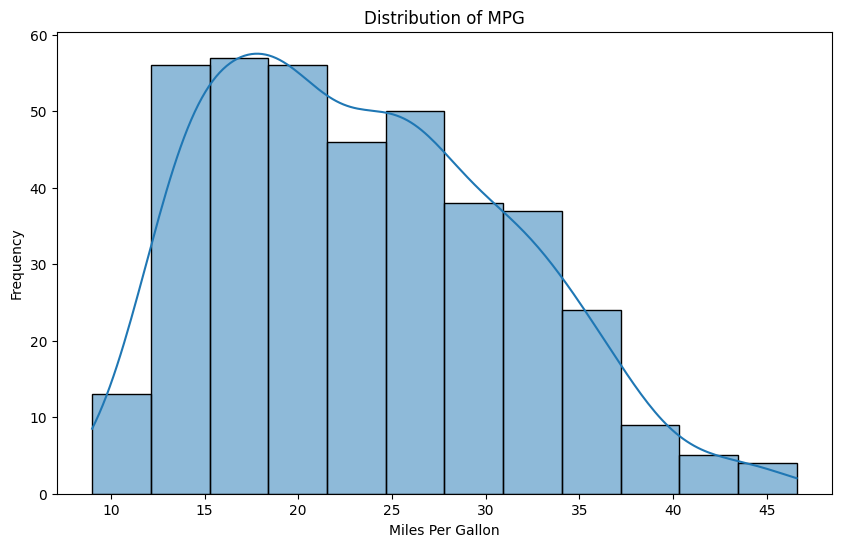

In [12]:

## 3. Exploratory Data Analysis (EDA)

# Distribution of the target variable (MPG)
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], kde=True)
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.show()


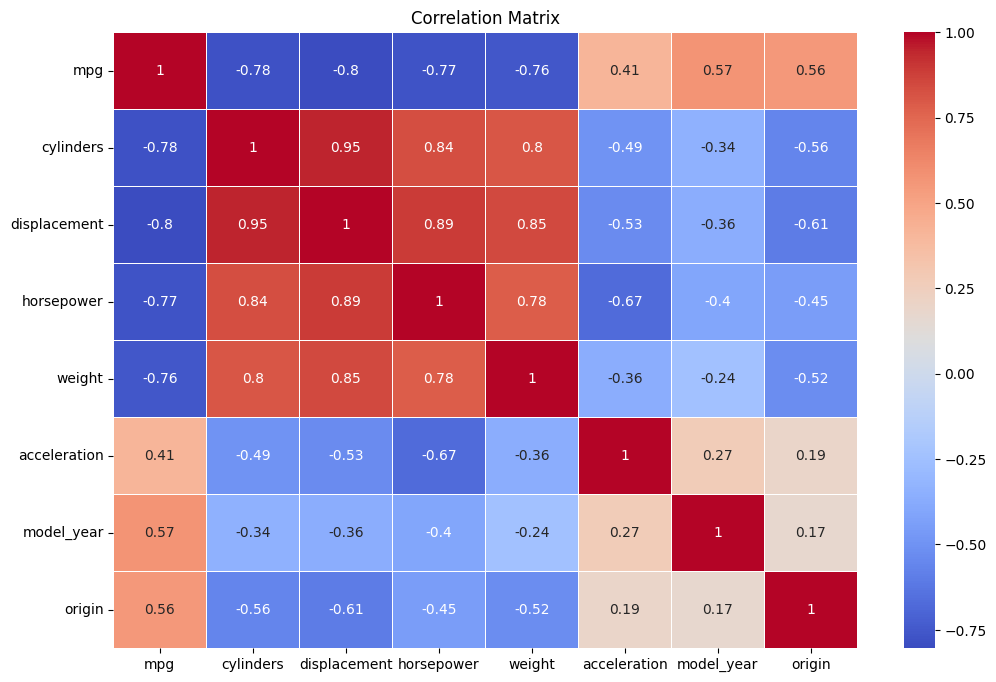

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
## 5. Model Preparation

# Define features and target
X = df[["horsepower", "weight", "acceleration", "displacement", "cylinders", "model_year", "origin"]]
y = df['mpg']

In [15]:
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (395, 7)
Target vector shape: (395,)


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 316 samples
Testing set: 79 samples


In [17]:
# Create and train a linear regression model as baseline
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_baseline = baseline_model.predict(X_test)


In [20]:
baseline_r2 = r2_score(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
print(f"Baseline Linear Regression Results:")
print(f"R² Score: {baseline_r2:.4f}")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"MAE: {baseline_mae:.4f}")


Baseline Linear Regression Results:
R² Score: 0.4361
RMSE: 5.6975
MAE: 3.0457


In [21]:
## 7. Advanced Model: Random Forest Regressor

# Create and train a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [26]:
y_pred_rf = rf_model.predict(X_test)
y_pred_best=y_pred_rf

In [23]:
# Evaluate RF model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")

Random Forest Results:
R² Score: 0.8187
RMSE: 3.2309
MAE: 2.0779


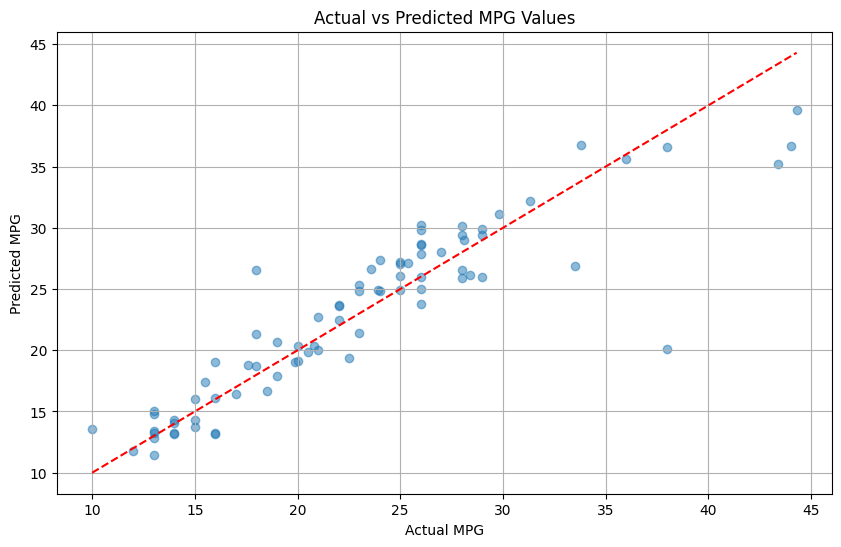

In [27]:

# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted MPG Values')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid(True)
plt.show()


In [28]:
# Save the best model to a file
with open('mpg_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Random Forest model saved as 'mpg_model.pkl'")

# Save model metrics for the Streamlit app
with open('model_metrics.txt', 'w') as file:
    file.write(f"R² Score: {rf_r2:.4f}\n")
    file.write(f"RMSE: {rf_rmse:.4f}\n")
    file.write(f"MAE: {rf_mae:.4f}\n")

print("Model metrics saved")


Random Forest model saved as 'mpg_model.pkl'
Model metrics saved
